In [2]:
# -*- coding: utf-8 -*-
from torchvision import datasets, transforms
import torch
import numpy as np
import pandas as pd
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from PIL import Image
from torchvision.utils import make_grid
torch.__version__

torch.manual_seed(42)

In [3]:
# You need to implement this by yourself

trainPath = '../fashion-mnist/train.csv' # Path of data
testPath = '../fashion-mnist/test.csv' # Path of data

class FashionDataset(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        dataCsv = pd.read_csv(trainPath)
        dataCsvImg = dataCsv.drop(columns = 'label')
        dataCsvImg = dataCsvImg.values.astype('uint8')
        self.images = dataCsvImg.reshape(-1, 28, 28)
        self.labels = dataCsv['label'].values
       
    def __len__(self):
       return len(self.images)
    
    def __getitem__(self, idx):
        img = self.transform(Image.fromarray(self.images[idx]))
        label = self.labels[idx]
        return img, label

transform = transforms.ToTensor()
train = FashionDataset(transform = transform)
train_loader = torch.utils.data.DataLoader(train, batch_size = 256, shuffle = True)
device = torch.device('mps')

In [4]:
# construct 
class generator(nn.Module):
  def __init__(self):
    super().__init__()
    #100->32->64->128->784
    self.dense0 = nn.Linear(100, 32) #receive a vector of 100 numbers random
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense3 = nn.Linear(128, 784)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))# leaky_relu (value * factor)
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense3(X)) # literature 
    X = X.view(X.shape[0], 28, 28) # convert to image (matrix)
    return X

class discriminator(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(784, 128)
    self.dense1 = nn.Linear(128, 64)
    self.dense2 = nn.Linear(64, 32)
    self.dense3 = nn.Linear(32, 1)
    self.dropout = nn.Dropout(0.3)
  def forward(self, X):
    X = X.view(X.shape[0], 28*28)
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X)
    return X

In [4]:
G = generator()
D = discriminator()

G_optimizer = optim.Adam(G.parameters(), lr = 0.002)
D_optimizer = optim.Adam(D.parameters(), lr = 0.002)

criterion = nn.BCEWithLogitsLoss() # combine sigmoid with and BCELoss

# device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device = torch.device('mps')

G.to(device)
D.to(device)

discriminator(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

EPOCH 001 finalized: discriminator loss 0.834610 - gererator loss 3.344868      


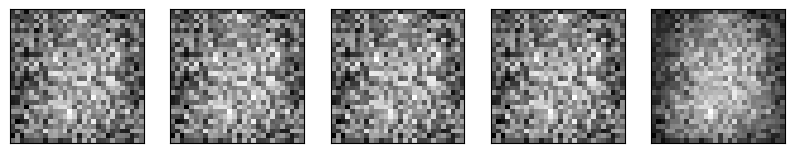

EPOCH 002 finalized: discriminator loss 0.664547 - gererator loss 4.927881      


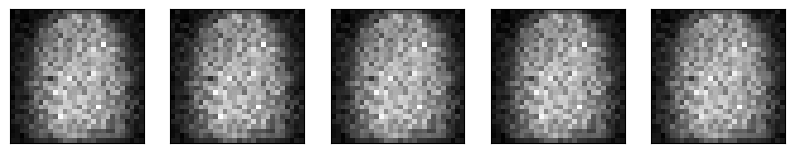

EPOCH 003 finalized: discriminator loss 0.517253 - gererator loss 5.439010      


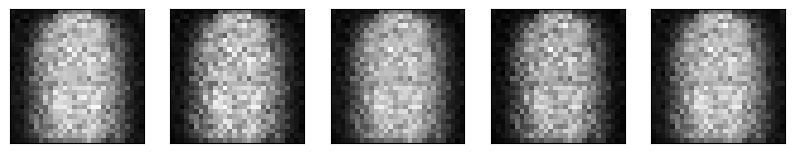

EPOCH 004 finalized: discriminator loss 0.585752 - gererator loss 5.322241      


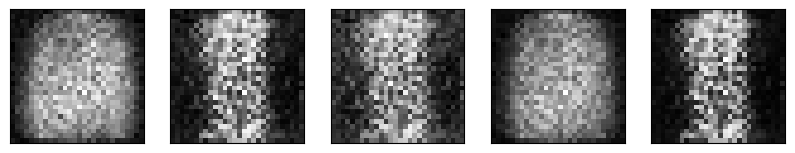

EPOCH 005 finalized: discriminator loss 0.678724 - gererator loss 4.701720      


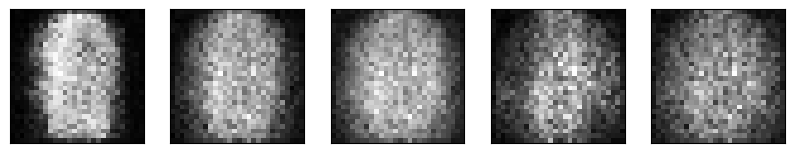

EPOCH 006 finalized: discriminator loss 0.715997 - gererator loss 4.092955      


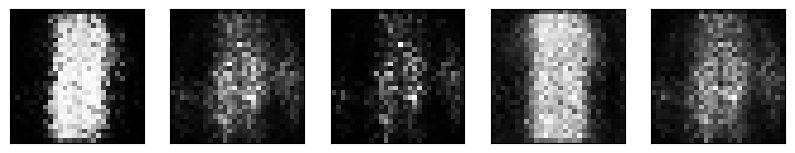

EPOCH 007 finalized: discriminator loss 0.844453 - gererator loss 2.993584      


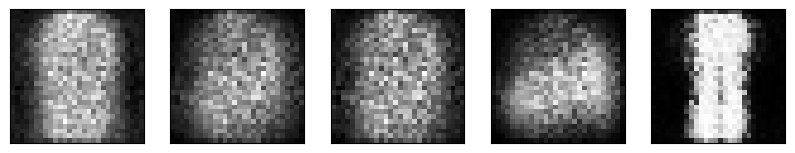

EPOCH 008 finalized: discriminator loss 0.809826 - gererator loss 3.249977      


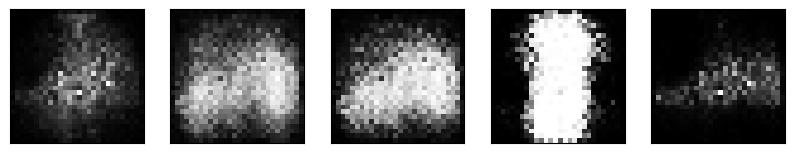

EPOCH 009 finalized: discriminator loss 0.770231 - gererator loss 3.248211      


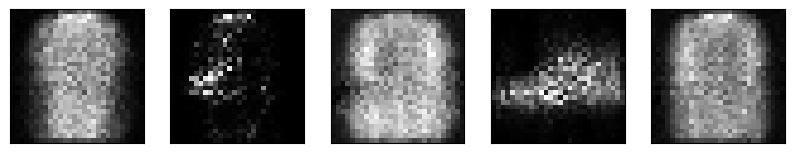

EPOCH 010 finalized: discriminator loss 0.913289 - gererator loss 2.782831      


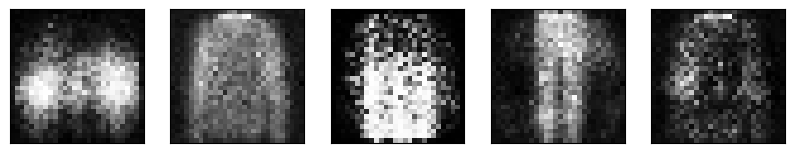

EPOCH 011 finalized: discriminator loss 0.958882 - gererator loss 2.498696      


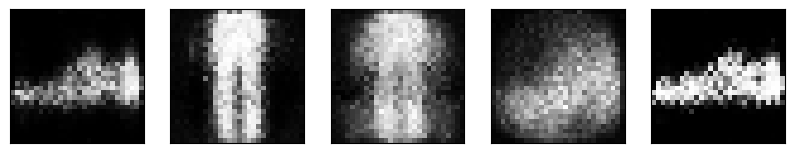

EPOCH 012 finalized: discriminator loss 0.962664 - gererator loss 2.250582      


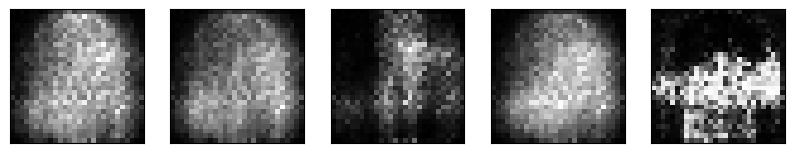

EPOCH 013 finalized: discriminator loss 0.933084 - gererator loss 2.323911      


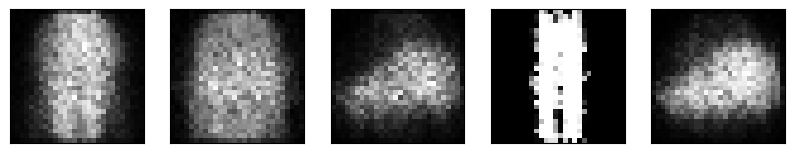

EPOCH 014 finalized: discriminator loss 0.935093 - gererator loss 2.353890      


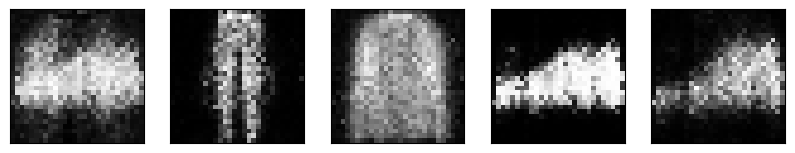

EPOCH 015 finalized: discriminator loss 0.943441 - gererator loss 2.275923      


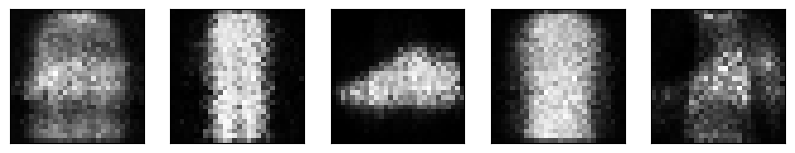

EPOCH 016 finalized: discriminator loss 0.947426 - gererator loss 2.243813      


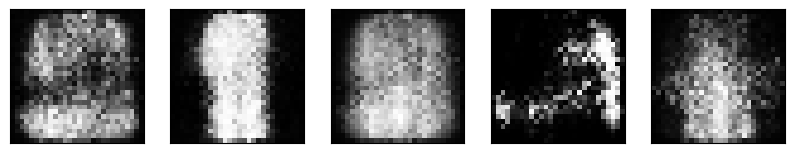

EPOCH 017 finalized: discriminator loss 0.998308 - gererator loss 2.194379      


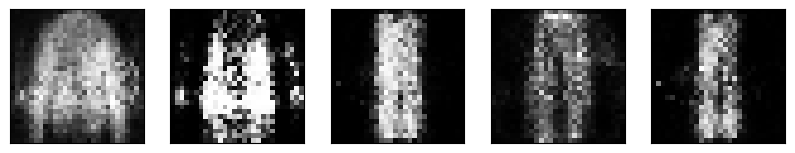

EPOCH 018 finalized: discriminator loss 1.053244 - gererator loss 1.911392      


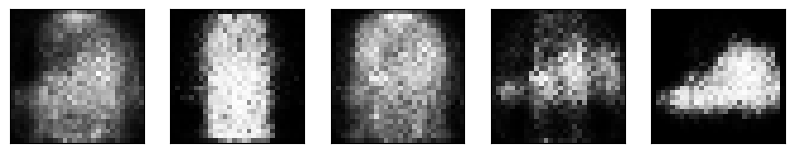

EPOCH 019 finalized: discriminator loss 1.080193 - gererator loss 1.787842      


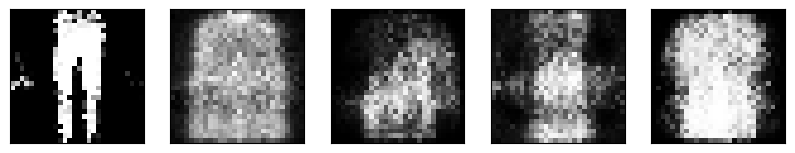

EPOCH 020 finalized: discriminator loss 1.072425 - gererator loss 1.830268      


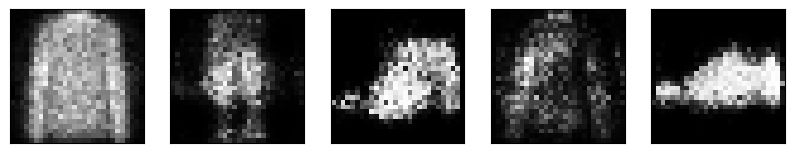

EPOCH 021 finalized: discriminator loss 1.091937 - gererator loss 1.777727      


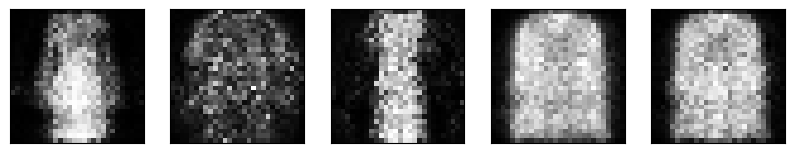

EPOCH 022 finalized: discriminator loss 1.106212 - gererator loss 1.829615      


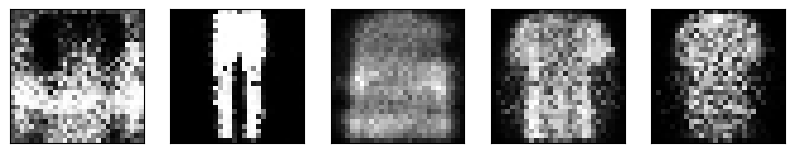

EPOCH 023 finalized: discriminator loss 1.115184 - gererator loss 1.691518      


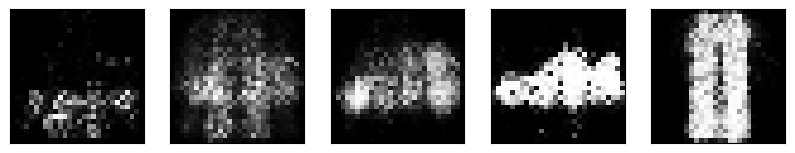

EPOCH 024 finalized: discriminator loss 1.124514 - gererator loss 1.660386      


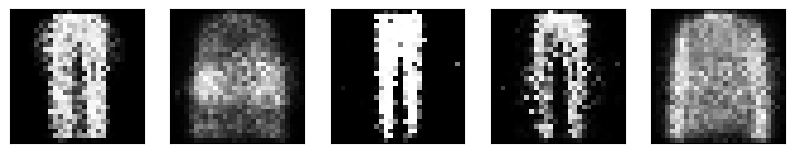

EPOCH 025 finalized: discriminator loss 1.153498 - gererator loss 1.596341      


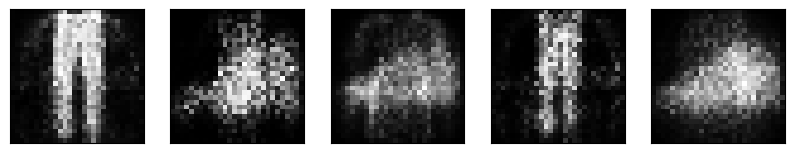

EPOCH 026 finalized: discriminator loss 1.153335 - gererator loss 1.608196      


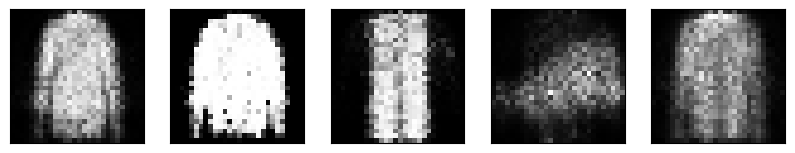

EPOCH 027 finalized: discriminator loss 1.166132 - gererator loss 1.572456      


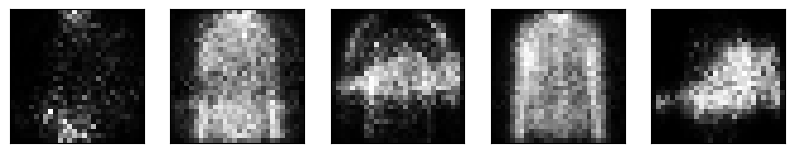

EPOCH 028 finalized: discriminator loss 1.150279 - gererator loss 1.576543      


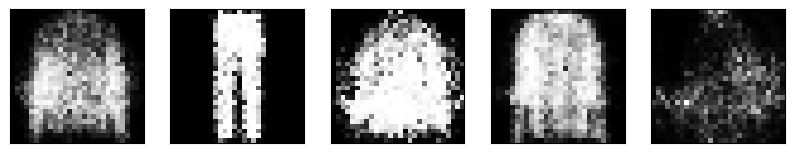

EPOCH 029 finalized: discriminator loss 1.179077 - gererator loss 1.494773      


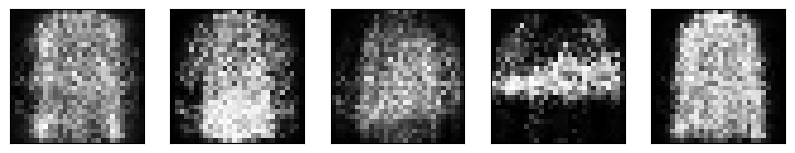

EPOCH 030 finalized: discriminator loss 1.181495 - gererator loss 1.504815      


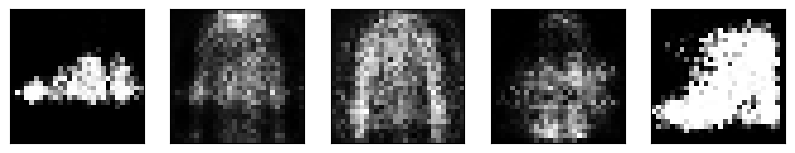

EPOCH 031 finalized: discriminator loss 1.192656 - gererator loss 1.454900      


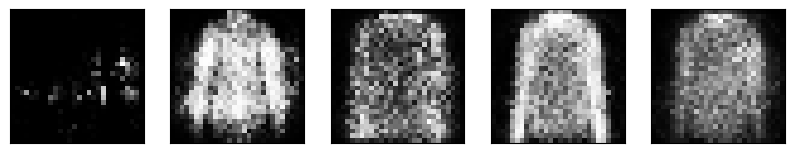

EPOCH 032 finalized: discriminator loss 1.194275 - gererator loss 1.425616      


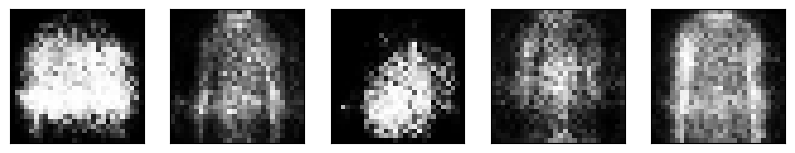

EPOCH 033 finalized: discriminator loss 1.194453 - gererator loss 1.450960      


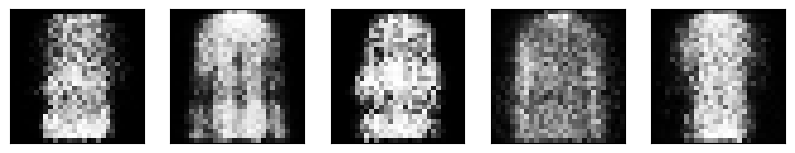

EPOCH 034 finalized: discriminator loss 1.174567 - gererator loss 1.573713      


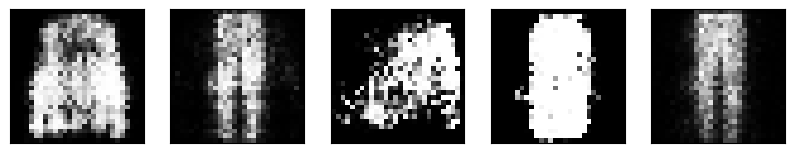

EPOCH 035 finalized: discriminator loss 1.184871 - gererator loss 1.486144      


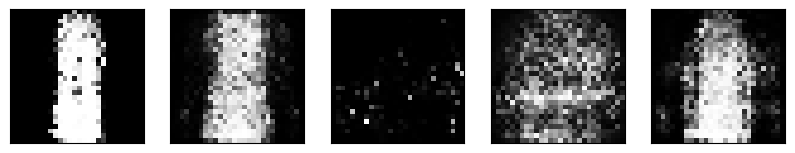

EPOCH 036 finalized: discriminator loss 1.163206 - gererator loss 1.615521      


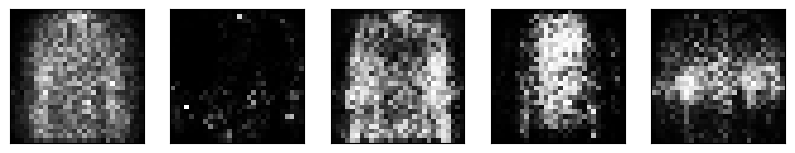

EPOCH 037 finalized: discriminator loss 1.161596 - gererator loss 1.526711      


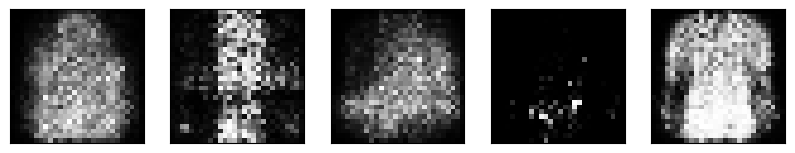

EPOCH 038 finalized: discriminator loss 1.209910 - gererator loss 1.405503      


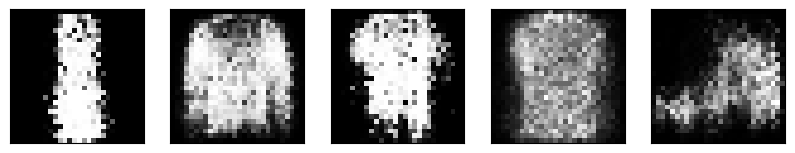

EPOCH 039 finalized: discriminator loss 1.190887 - gererator loss 1.513031      


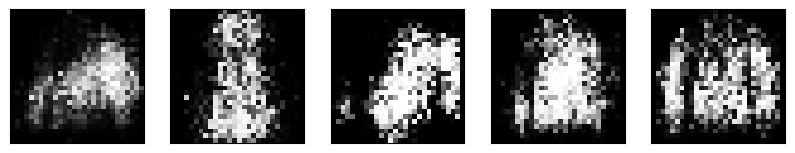

EPOCH 040 finalized: discriminator loss 1.190123 - gererator loss 1.472954      


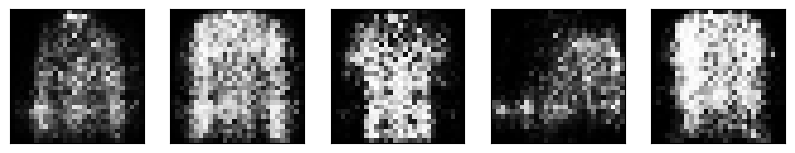

EPOCH 041 finalized: discriminator loss 1.188632 - gererator loss 1.546177      


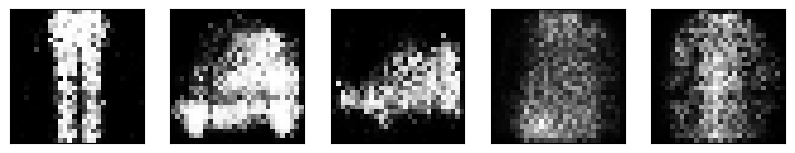

EPOCH 042 finalized: discriminator loss 1.194904 - gererator loss 1.534837      


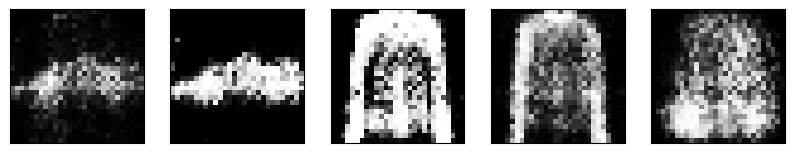

EPOCH 043 finalized: discriminator loss 1.195544 - gererator loss 1.535239      


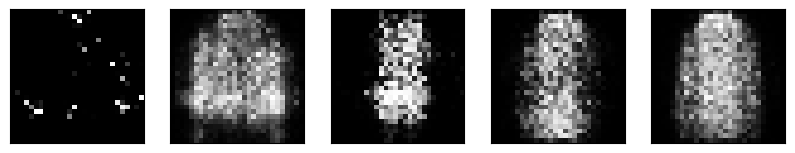

EPOCH 044 finalized: discriminator loss 1.197196 - gererator loss 1.551211      


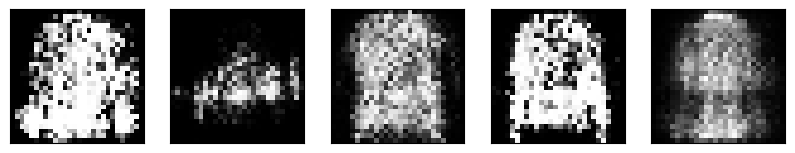

EPOCH 045 finalized: discriminator loss 1.191593 - gererator loss 1.483739      


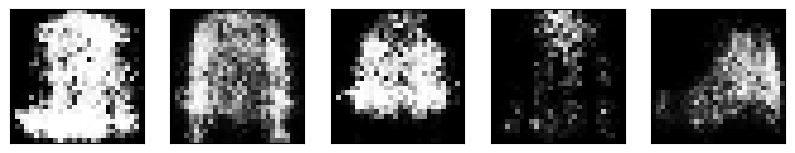

EPOCH 046 finalized: discriminator loss 1.176853 - gererator loss 1.534647      


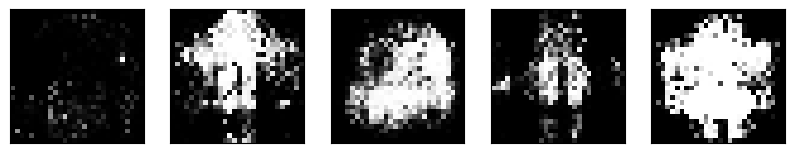

EPOCH 047 finalized: discriminator loss 1.203561 - gererator loss 1.525184      


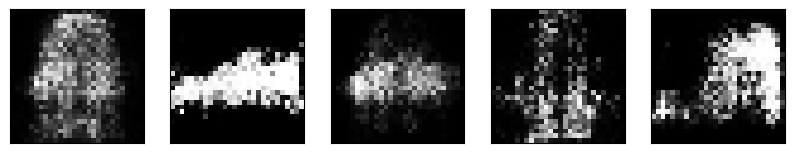

EPOCH 048 finalized: discriminator loss 1.217164 - gererator loss 1.417244      


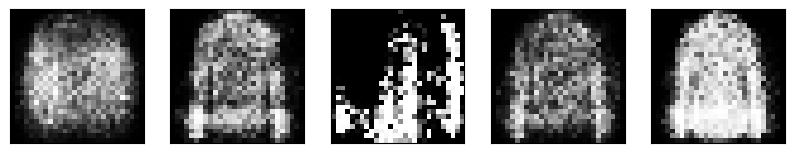

EPOCH 049 finalized: discriminator loss 1.201843 - gererator loss 1.417843      


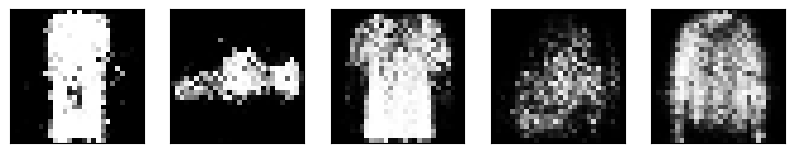

EPOCH 050 finalized: discriminator loss 1.191654 - gererator loss 1.520749      


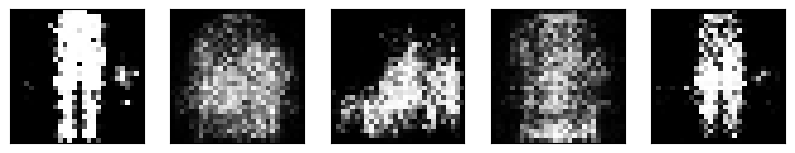

EPOCH 051 finalized: discriminator loss 1.197517 - gererator loss 1.450238      


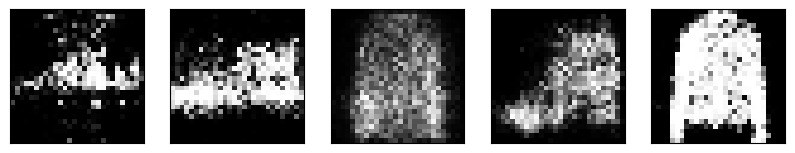

EPOCH 052 finalized: discriminator loss 1.183870 - gererator loss 1.385200      


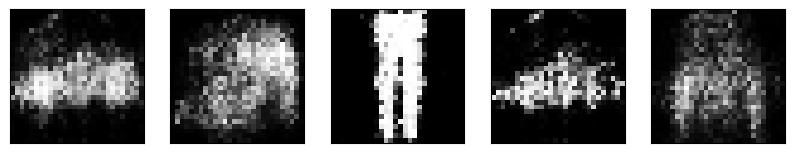

EPOCH 053 finalized: discriminator loss 1.219883 - gererator loss 1.547538      


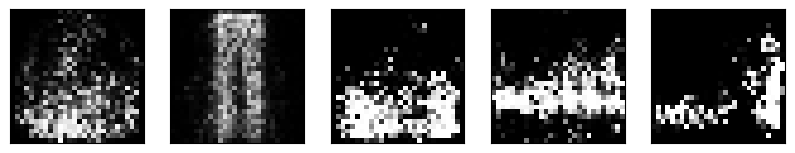

EPOCH 054 finalized: discriminator loss 1.224753 - gererator loss 1.393669      


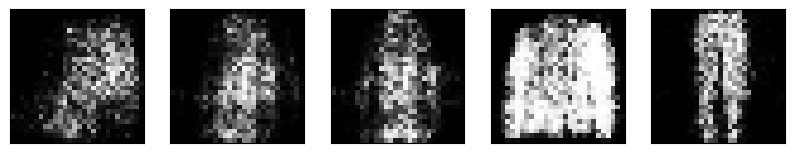

EPOCH 055 finalized: discriminator loss 1.198355 - gererator loss 1.315463      


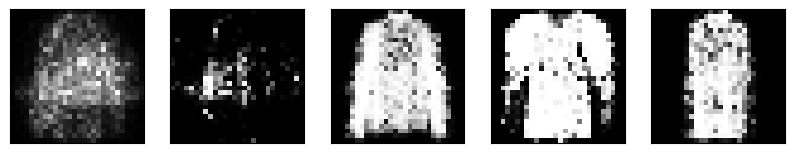

EPOCH 056 finalized: discriminator loss 1.215070 - gererator loss 1.409564      


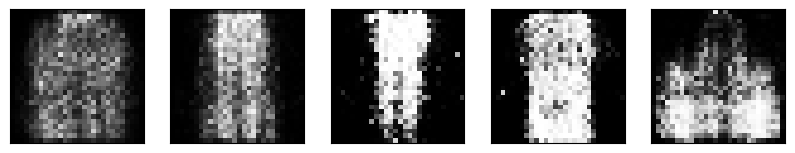

EPOCH 057 finalized: discriminator loss 1.213492 - gererator loss 1.401125      


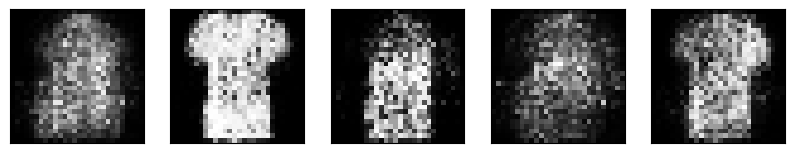

EPOCH 058 finalized: discriminator loss 1.232758 - gererator loss 1.365707      


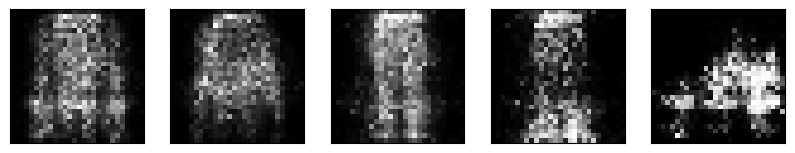

EPOCH 059 finalized: discriminator loss 1.232484 - gererator loss 1.363822      


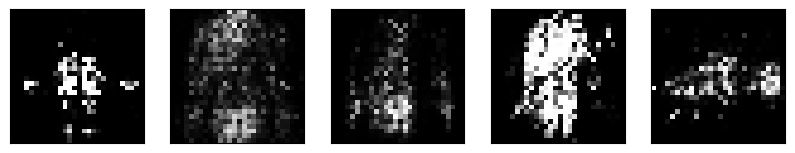

EPOCH 060 finalized: discriminator loss 1.233265 - gererator loss 1.305011      


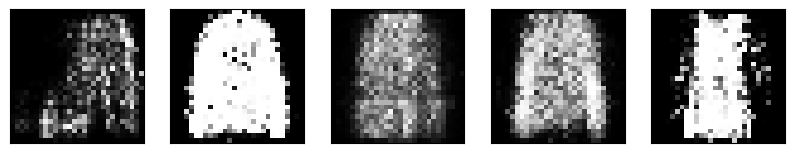

EPOCH 061 finalized: discriminator loss 1.225579 - gererator loss 1.284444      


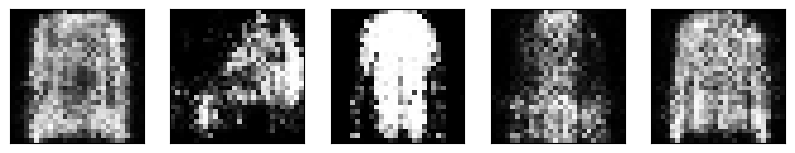

EPOCH 062 finalized: discriminator loss 1.239121 - gererator loss 1.272570      


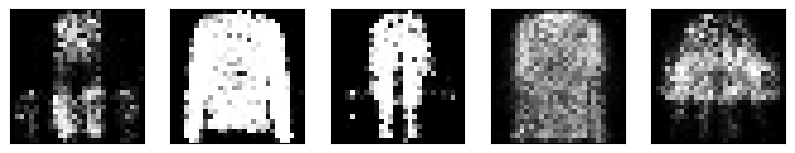

EPOCH 063 finalized: discriminator loss 1.226483 - gererator loss 1.269580      


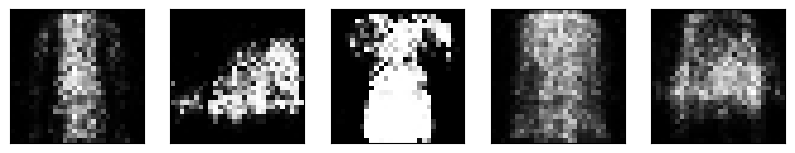

EPOCH 064 finalized: discriminator loss 1.213972 - gererator loss 1.324098      


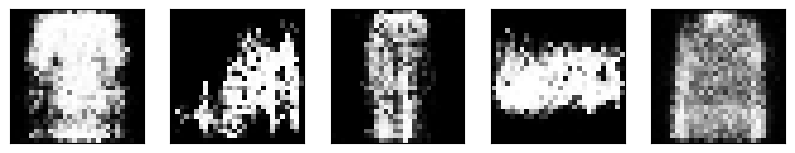

EPOCH 065 finalized: discriminator loss 1.219851 - gererator loss 1.316487      


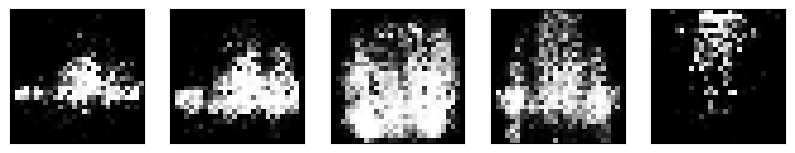

EPOCH 066 finalized: discriminator loss 1.224126 - gererator loss 1.340709      


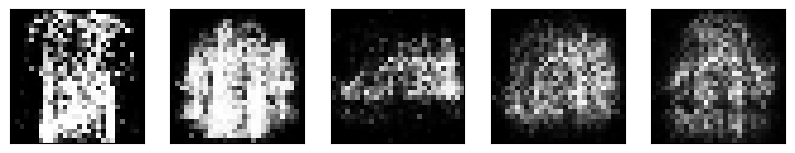

EPOCH 067 finalized: discriminator loss 1.249944 - gererator loss 1.249988      


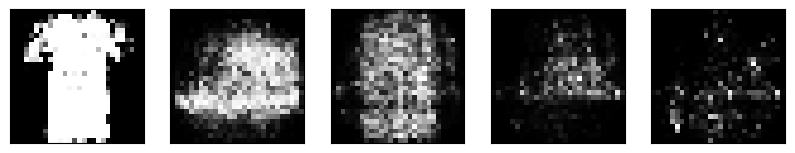

EPOCH 068 finalized: discriminator loss 1.242573 - gererator loss 1.290286      


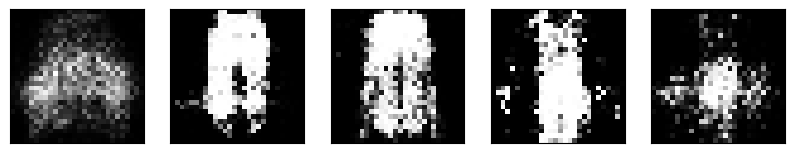

EPOCH 069 finalized: discriminator loss 1.246895 - gererator loss 1.298000      


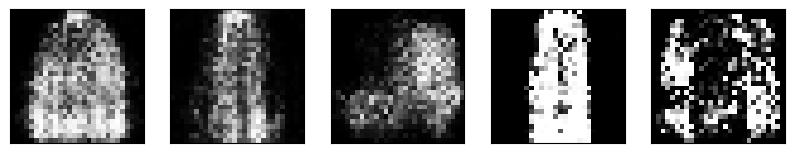

EPOCH 070 finalized: discriminator loss 1.230989 - gererator loss 1.211372      


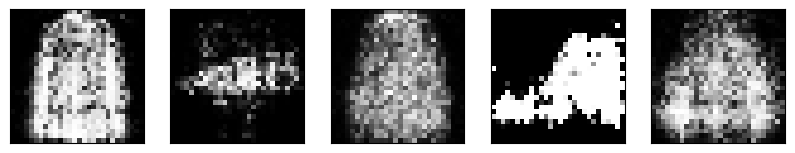

EPOCH 071 finalized: discriminator loss 1.229055 - gererator loss 1.302429      


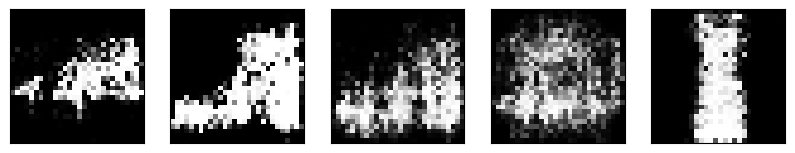

EPOCH 072 finalized: discriminator loss 1.223796 - gererator loss 1.242589      


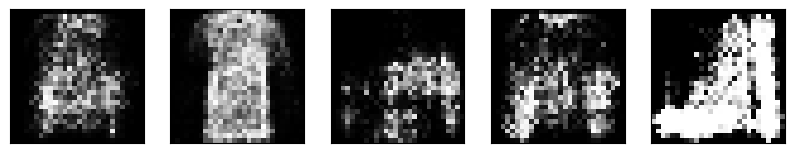

EPOCH 073 finalized: discriminator loss 1.226767 - gererator loss 1.276168      


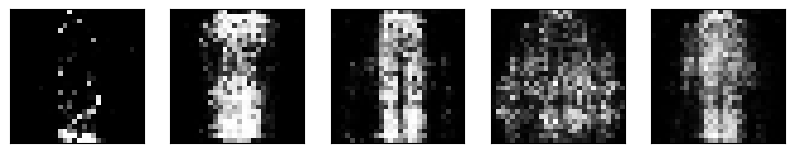

EPOCH 074 finalized: discriminator loss 1.230410 - gererator loss 1.257468      


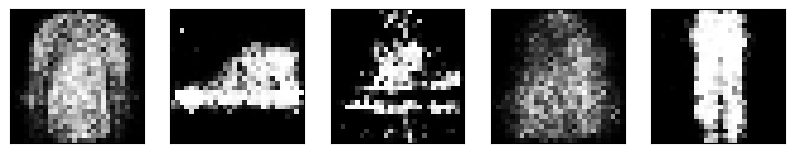

EPOCH 075 finalized: discriminator loss 1.241565 - gererator loss 1.241841      


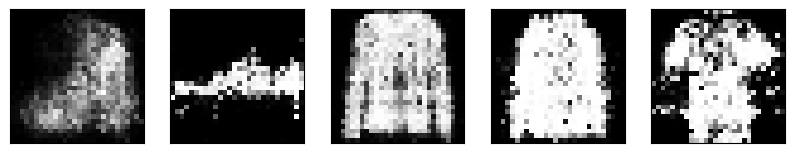

EPOCH 076 finalized: discriminator loss 1.248462 - gererator loss 1.208810      


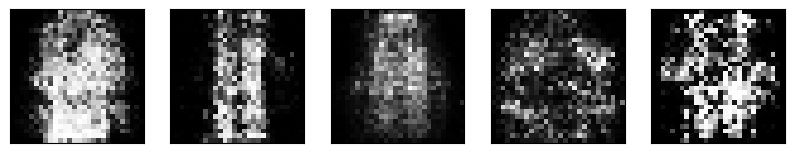

EPOCH 077 finalized: discriminator loss 1.252086 - gererator loss 1.241240      


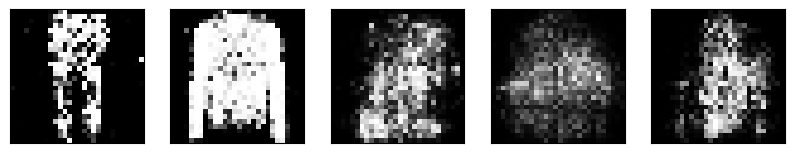

EPOCH 078 finalized: discriminator loss 1.248251 - gererator loss 1.214968      


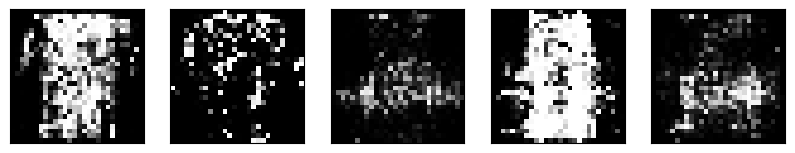

EPOCH 079 finalized: discriminator loss 1.231964 - gererator loss 1.232667      


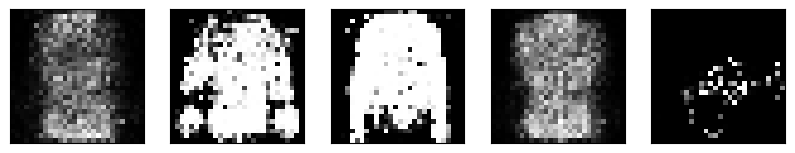

EPOCH 080 finalized: discriminator loss 1.241507 - gererator loss 1.225573      


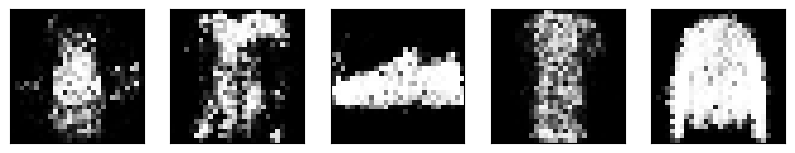

EPOCH 081 finalized: discriminator loss 1.253940 - gererator loss 1.210744      


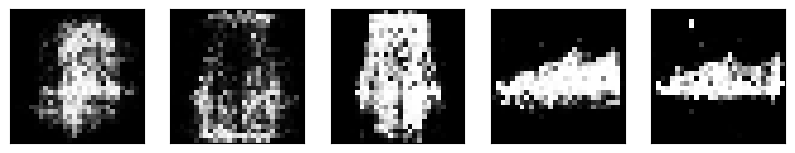

EPOCH 082 finalized: discriminator loss 1.240350 - gererator loss 1.299633      


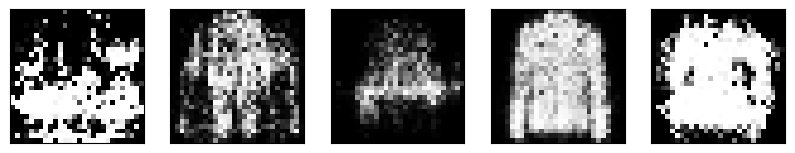

EPOCH 083 finalized: discriminator loss 1.244604 - gererator loss 1.245048      


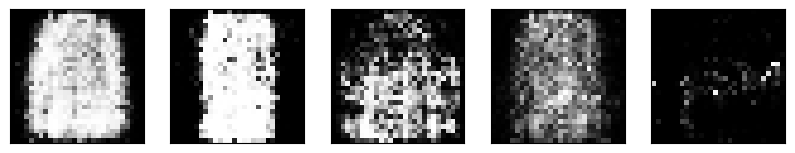

EPOCH 084 finalized: discriminator loss 1.253057 - gererator loss 1.267645      


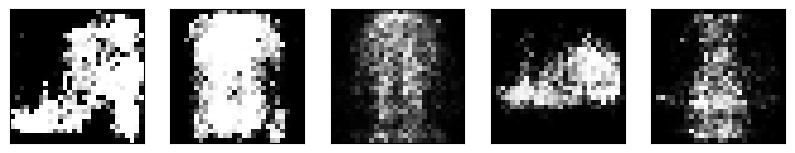

EPOCH 085 finalized: discriminator loss 1.253212 - gererator loss 1.378585      


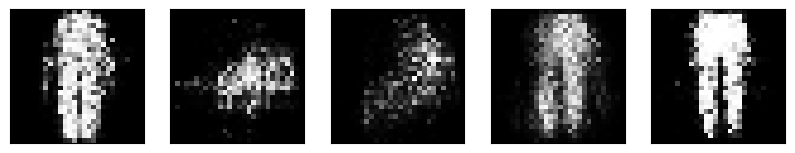

EPOCH 086 finalized: discriminator loss 1.233397 - gererator loss 1.333234      


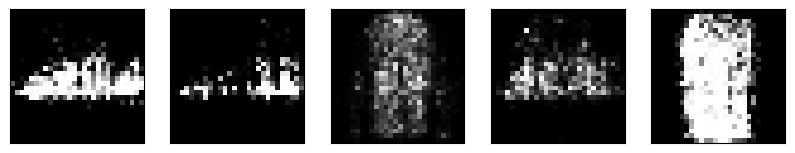

EPOCH 087 finalized: discriminator loss 1.242124 - gererator loss 1.289953      


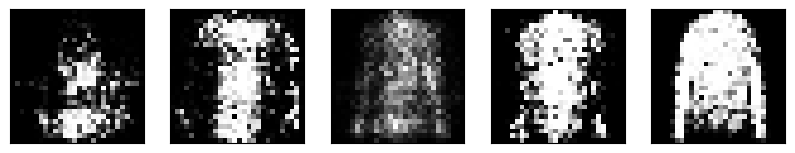

EPOCH 088 finalized: discriminator loss 1.228586 - gererator loss 1.327966      


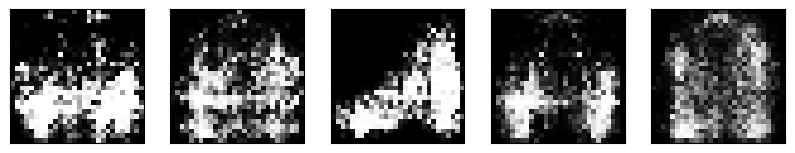

EPOCH 089 finalized: discriminator loss 1.224707 - gererator loss 1.375674      


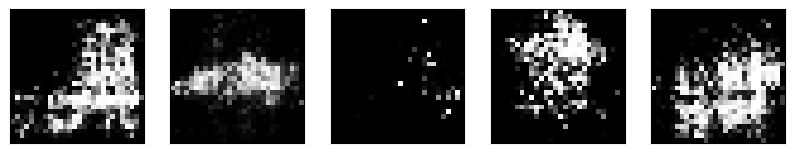

EPOCH 090 finalized: discriminator loss 1.219358 - gererator loss 1.400295      


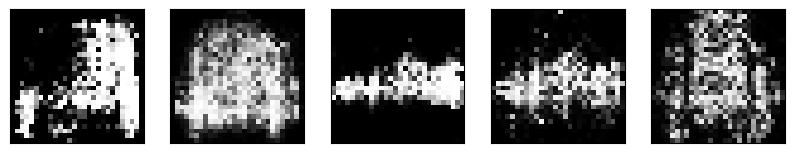

EPOCH 091 finalized: discriminator loss 1.225398 - gererator loss 1.308810      


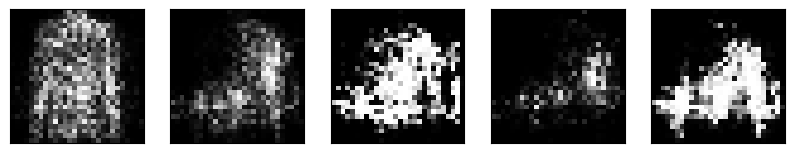

EPOCH 092 finalized: discriminator loss 1.212391 - gererator loss 1.390509      


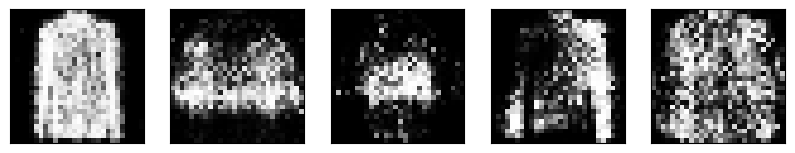

EPOCH 093 finalized: discriminator loss 1.222767 - gererator loss 1.379897      


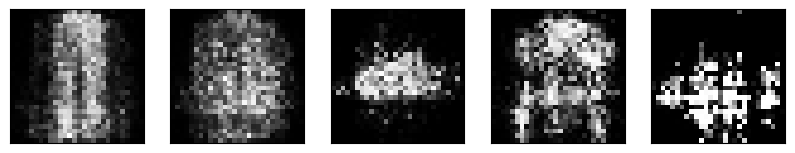

EPOCH 094 finalized: discriminator loss 1.222545 - gererator loss 1.365310      


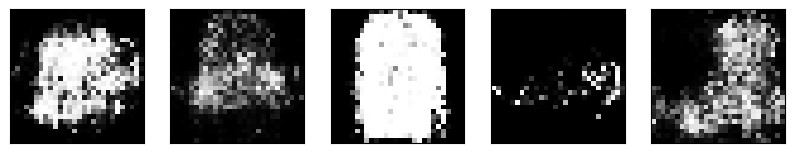

EPOCH 095 finalized: discriminator loss 1.212893 - gererator loss 1.360959      


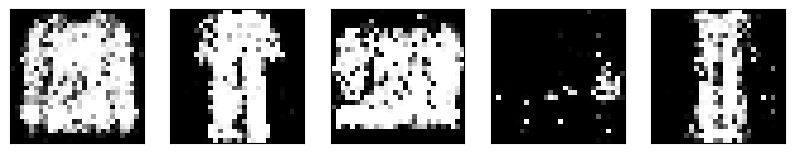

EPOCH 096 finalized: discriminator loss 1.219505 - gererator loss 1.288764      


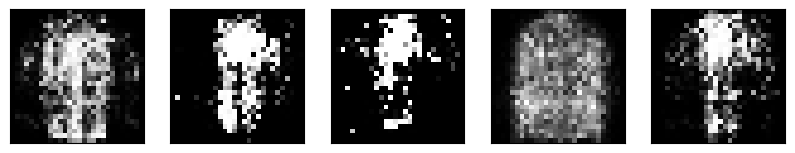

EPOCH 097 finalized: discriminator loss 1.220249 - gererator loss 1.349551      


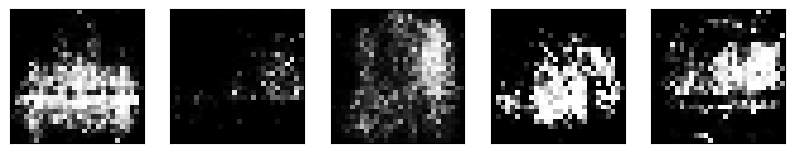

EPOCH 098 finalized: discriminator loss 1.224378 - gererator loss 1.388989      


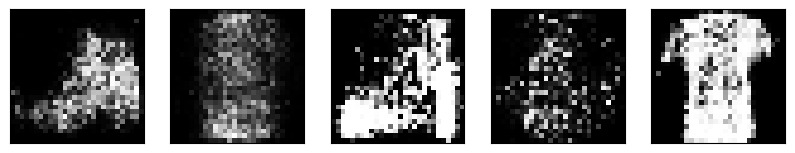

EPOCH 099 finalized: discriminator loss 1.226883 - gererator loss 1.315303      


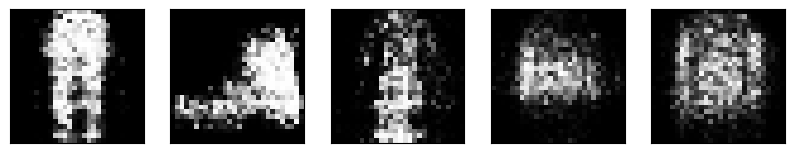

EPOCH 100 finalized: discriminator loss 1.221416 - gererator loss 1.308139      


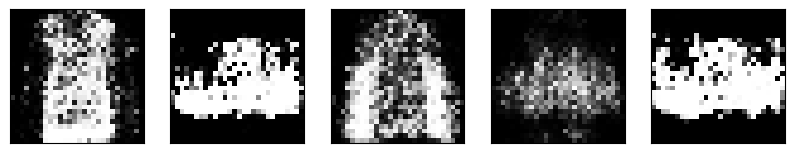

In [15]:
for epoch in range(100):
    D_running_loss = 0
    G_running_loss = 0
    
    for i, (images_real, _) in enumerate(train_loader):
        batch_size = images_real.size(0)
        images_real = images_real * 2 - 1
        images_real = images_real.to(device)

        # Train The Generator
        G_optimizer.zero_grad()
        random = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
        random = torch.from_numpy(random).float().to(device)
        images_false = G.forward(random)
        output_false = D.forward(images_false)
        labels_false = torch.ones(batch_size).to(device)
        G_loss = criterion(output_false.view(*labels_false.shape), labels_false)
        G_loss.backward()
        G_optimizer.step()

        # Train The Discriminator
        D_optimizer.zero_grad()
        outputs_real = D.forward(images_real)
        labels_real = (torch.ones(batch_size) * 0.9).to(device)
        D_loss_real = criterion(outputs_real.view(*labels_real.shape), labels_real)

        random = np.random.uniform(-1., 1., (batch_size, 100))
        random = torch.from_numpy(random).float().to(device)
        images_false = G.forward(random)
        outputs_false = D.forward(images_false)
        labels_false = torch.zeros(batch_size).to(device)
        D_loss_false = criterion(outputs_false.view(*labels_false.shape), labels_false)

        D_loss = D_loss_real + D_loss_false
        D_loss.backward()
        D_optimizer.step()

        D_running_loss += D_loss.item()
        G_running_loss += G_loss.item()
  
  
    # print the loss after each epoch
    D_running_loss /= len(train_loader)
    G_running_loss /= len(train_loader)
    print('EPOCH {:03d} finalized: discriminator loss {:03.6f} - gererator loss {:03.6f}      '.format(epoch + 1, D_running_loss, G_running_loss))

    fig, ax = plt.subplots(1, 5, figsize=(10,5))
    for i in range(5):
      ax[i].imshow(images_false.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
      ax[i].xaxis.set_visible(False)
      ax[i].yaxis.set_visible(False)
    plt.show()

In [16]:
torch.save(G, 'originalGAN.pth')

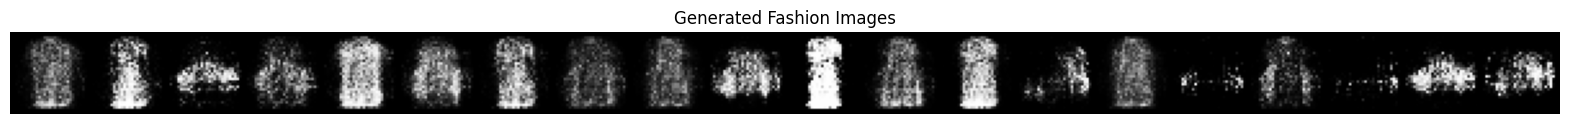

In [11]:
G = torch.load('originalGAN.pth')
random = np.random.uniform(-1., 1., (20, 100))

random = torch.from_numpy(random).float().to(device)

G.eval()
output  = G.forward(random)

# output = output.cpu().detach().numpy()

# for i in range(output.shape[0]):
#     plt.figure(figsize=(1, 1))
#     plt.imshow(output[i, :].squeeze(), cmap='gray')
#     plt.show()

fig, ax = plt.subplots(figsize=(output.shape[0],output.shape[0]))
output = output.view(output.shape[0], 1, 28, 28)
grid = make_grid(output, nrow=output.shape[0], normalize=True).permute(1,2,0).cpu().numpy()
ax.imshow(grid)
plt.title('Generated Fashion Images')
plt.axis('off')
plt.show()